# Linear Regression

Instructor: Jhun Brian M. Andam \
Course: DS312 - Data Mining and Application

Objectives:
- Evaluate the relationship between two variables.
- Compute and construct the line of the best fit between two variables.
- Evaluate the performance of the regression model.

Before we dive into the details of linear regression, let’s take a step back first and review classification and regression which are under the supervised learning category.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*o7-FKhwQlgaSX0oTSw_3Gw.png" width="450"></center>

- Differentiate classification from regression.
- What algorithms were we able to use?
- What is unsupervised learning?
- Use cases for classification and regression.
- What are the dependent and the independent variables?

## Simple Linear Regression

Simple linear regression is used to model the relationship between two continuous variables. Often, the objective is to predict the value of an output variable (or response) based on the value of an input (or predictor) variable.

<center><img src="https://www.jmp.com/en_ph/statistics-knowledge-portal/what-is-regression/_jcr_content/par/styledcontainer_2069/par/lightbox_c6aa_copy/lightboxImage.img.gif/1548351202354.gif" width="700"></center>

**Hypothesis: Assumes that the relationship between the independent and dependent variables can be described by a straight line.**

* Linear Regression function
    - **$y = mx + c$**
        - $m$ is the slope of the line
        - $c$ is the $y$ intercept
        - $x$ is the independent variable
<br></br>
* Slope of Regression Line
    - $m = r\frac{\sigma_y}{\sigma_x}$
        - $r$ is the Pearson correlation coefficient
        - $\sigma_y$ is the standard deviation of $y$
        - $\sigma_x$ is the standard deviation of $x$
<br></br>
* $y$ intercept of a Regression Line
    - $c = \bar{y} - m\bar{x}$
        - $m$ is the slope of the regression line
        - $\bar{y}$ is the mean of $y$ values
        - $\bar{x}$ is the mean of $x$ values
<br></br> 
* Pearson Correlation
    - $r = \frac{\sum((x-\bar{x})(y-\bar{y}))}{\sqrt{\sum(x-\bar{x})^2 \sum{(y-\bar{y})^2}}}$

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

sns.set_theme(font='Times New Roman')
%matplotlib inline

import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pio.renderers.default = 'notebook'

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv')
df = df.iloc[:, 1:]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X = df['TV']
y = df['Sales']

X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

# Why do we need to split the data?
# What is this method called?

### Calculate the Pearson Correlation Coefficient

In [4]:
dframe = pd.DataFrame()
X_train_mean = X_train.mean()
y_train_mean = y_train.mean()

dframe['(x-x̄)'] = X_train - X_train_mean
dframe['(y-ȳ)'] = y_train - y_train_mean
dframe['(x-x̄)*(y-ȳ)'] = dframe['(x-x̄)'] * dframe['(y-ȳ)']
dframe['(x-x̄)²'] = dframe['(x-x̄)'] ** 2
dframe['(y-ȳ)²'] = dframe['(y-ȳ)'] ** 2
dframe

,(x-x̄),(y-ȳ),(x-x̄)*(y-ȳ),(x-x̄)²,(y-ȳ)²
114,-74.758,0.295333,-22.078529,5588.758564,0.087222
173,15.442,-2.604667,-40.221263,238.455364,6.784288
5,-144.258,-7.104667,1024.905004,20810.370564,50.476288
126,-145.158,-7.704667,1118.394004,21070.844964,59.361888
117,-76.558,-4.904667,375.491471,5861.127364,24.055755
...,...,...,...,...,...
106,-127.958,-7.104667,909.098937,16373.249764,50.476288
14,51.142,4.695333,240.128737,2615.504164,22.046155
92,64.742,5.095333,329.882071,4191.526564,25.962422
179,12.642,-1.704667,-21.550396,159.820164,2.905888


**Pearson Correlation**
### $r = \frac{\sum((x-\bar{x})(y-\bar{y}))}{\sqrt{\sum(x-\bar{x})^2 \sum{(y-\bar{y})^2}}}$

In [5]:
r = dframe['(x-x̄)*(y-ȳ)'].sum() / np.sqrt(dframe['(x-x̄)²'].sum() * dframe['(y-ȳ)²'].sum())
print(f"Pearson Correlation Coefficient: {r}")

# what does this value represent?

Pearson Correlation Coefficient: 0.7685704440924755


Visualizing Correlation
- https://rpsychologist.com/correlation/

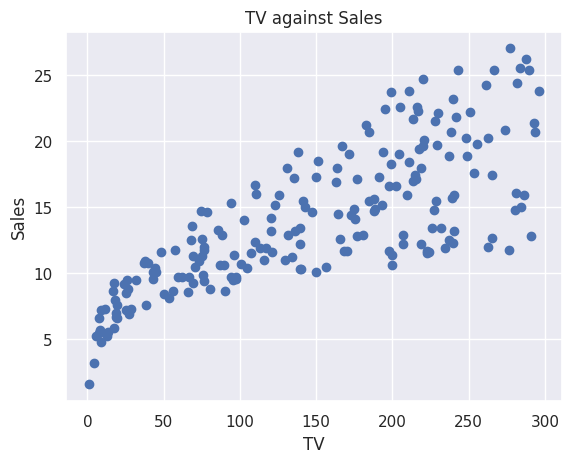

In [6]:
plt.scatter(X, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV against Sales');

### Calculating the Slope ($m$) of the Regression Line

### $m = r\frac{\sigma_y}{\sigma_x}$

*Standard Deviation ($\sigma$) of a series*

$\sigma_x = \sqrt{\frac{\sum(x - \bar{x})^2}{n-1}}$
- $n$ is the number of samples

In [7]:
std_x = np.sqrt(dframe['(x-x̄)²'].sum() / len(dframe) - 1)
std_y = np.sqrt(dframe['(y-ȳ)²'].sum() / len(dframe) - 1)

# slope or the m
m = r * (std_y / std_x)
print(f"Slope: {m}")

Slope: 0.04601378475293349


### Calculating the Y-Intercept

### $c = \bar{y}-m\bar{x}$

In [8]:
# y intercept or the c
c = y_train_mean - (m * X_train_mean)
print(f"Y Intercept: {c}")

Y Intercept: 7.266490178427466


### Linear Regression Function
*This function will be used to predict the Sales for a given number of TVs.*

$y = mx + c$ \
$y = 0.05x + 7.27$

This means that for every one unit you move to the right (along the x-axis), you move up by 0.05 units. 

In [9]:
def predict(x, m=m, c=c):
    return (m * x) + c

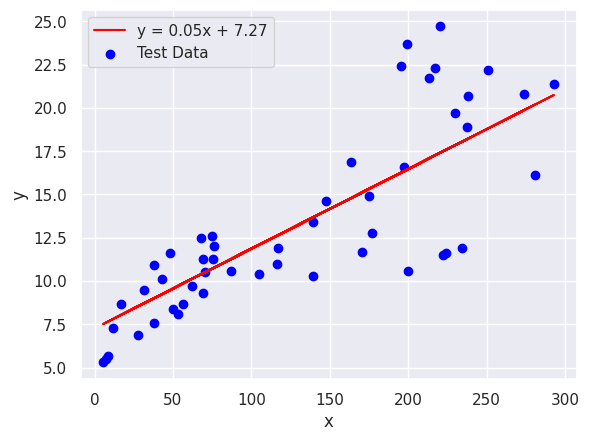

In [10]:
plt.plot(X_test, predict(X_test.values), label='y = 0.05x + 7.27', color='red')
plt.scatter(X_test, y_test, label='Test Data', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Model Evaluation
Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.

- $R^2 = 1-\frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y}_i)^2}$
    - The coefficient of determination, or R2 , is a measure that provides information about the **goodness of fit of a model**. In the context of regression it is a statistical measure of how well the regression line approximates the actual data.
<br></br>
- $MSE = \frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$
    - Mean squared error (MSE) measures the amount of error in statistical models. It assesses the **average squared difference** between the observed and predicted values. **When a model has no error, the MSE equals zero**. As model error increases, its value increases. The mean squared error is also known as the mean squared deviation (MSD).

**Other Evaluation Metrics for REGRESSION**
<center><img src="https://miro.medium.com/v2/resize:fit:1358/1*rVTCIffI2D_-i_CGeHwF6A.png" width=700></center>


In [11]:
def r2(X_test, y_test):
    y_pred = predict(X_test)
    return 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

def mse(X_test, y_test):
    y_pred = predict(X_test)
    sqrd_errors = (y_test - y_pred) ** 2
    return np.mean(sqrd_errors)

In [12]:
r2_result = r2(X_test, y_test)
mse_result = mse(X_test, y_test)

print(f"R2 score: {r2_result}")
print(f"MSE score: {mse_result}")

R2 score: 0.6591514147888864
MSE score: 9.21880352513695


* Are these good results?
* What can we do to improve the results?

## Multiple Linear Regression

<center><img src="https://uamediaprod.github.io/public-assets/futurelearn/Data%20Analytics%20for%20Managers/Week%201%20-%20GIF/PS-3D-Representation-(1).gif" width=500></center>

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

* **Multiple Linear Regression Function**
    * $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \in$
    * $y$ is the dependent variable
    * $\beta_0$ is the $y$ intercept
    * $\beta_1, \beta_2, \beta_n$ are coefficients (slopes) of the independent variables
    * $x_1, x_2, x_n$ are the independent variables
    * $\in$ is the error term

In [18]:
fig = px.scatter_3d(df, x='TV', y='Sales', z='Radio',color='Sales', title="3D Scatter Plot (TV vs. Sales vs. Radio)")
fig.show()

### Fitting Multiple Linear Regression Model using Sci-Kit Learn

In [29]:
X = df[['TV', 'Radio']]
y = df['Sales']

X_train, X_test, y_train, y_test = tts(X,y, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

In [32]:
# what is this value?
reg.score(X_test, y_test)

0.8944787062601195

In [34]:
# how about this one?
reg.score(X_train, y_train)

0.8965547603211033

In [40]:
y_pred = reg.predict(X_test)
pred_df = pd.DataFrame({'TV':X_test['TV'], 'Radio':X_test['Radio'], 'Sales':y_pred})

fig = px.scatter_3d(pred_df, x='TV', y='Sales', z='Radio',color='Sales', title="3D Scatter Plot (TV vs. Sales vs. Radio)")
fig.show()

### Laboratory Activity:

1. Use the following link to access the dataset.
    - https://raw.githubusercontent.com/JhunBrian/DS-312/main/materials/Linear%20Regression/kc_house_data.csv
2. Perform a **Simple Linear Regression** to predict the price of a house given an independent variable.
    - You must figure out what singular independent variable to use.
3. Perform a **Multiple Linear Regression** to predict the price of a house using 5 independent variables.
    - Decide which among the 20 variables to be used as the 5 independent variables.
4. Evaluate both models using $R^2$, $MSE$ and $RMSE$ metrics. Explain each metric.